# Canadian Bank Reviews
#### Analyzing user sentiments based on App Store, Google Play Store & Twitter reviews for top 5 Canadian banks. Building insights from features that correlate user sentiment postively or negatively with the bank's performance.

### 1.1 - Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import datetime
import datatable as dt
import matplotlib.pyplot as plt

### 1.2 - Importing the dataset from App Store, Google Play Store & Twitter

In [32]:
df_rbc_reviews = dt.fread("/Users/chan/Desktop/BR_3JRC/App Reviews/RBC_App_Reviews_Translated.csv", encoding='utf-8')
print(df_rbc_reviews.shape)   # (nrows, ncols)
print(df_rbc_reviews.names)   # column names

(17883, 23)
('App Name', 'App Store', 'App', 'Store', 'App ID', 'Review ID', 'Country', 'Version', 'Rating', 'Date', 'Author', 'Subject', 'Body', 'Translated Subject', 'Translated Body', 'Sentiment', 'Device', 'Language', 'OS Version', 'Reply URL', 'Topics', 'Custom Topics', 'Tags')


In [33]:
df_rbc_tweets = dt.fread("/Users/chan/Desktop/BR_3JRC/Twitter Reviews/rbc_tweets.csv", encoding='utf-8')
df_rbc_tweets[:, 'Platform'] = 'Twitter' # adding a column in sync with 'platform' in app reviews
df_rbc_tweets[:, 'App Name'] = 'RBC' # adding a column in sync with 'app name' in app reviews
print(df_rbc_tweets.shape)   # (nrows, ncols)
print(df_rbc_tweets.names)   # column names

(132685, 12)
('user', 'fullname', 'tweet-id', 'timestamp', 'url', 'likes', 'replies', 'retweets', 'text', 'html', 'Platform', 'App Name')


### 1.3 - Preliminary Data Cleaning & Manipulation

#### Subsetting the table & renaming columns

In [34]:
x = [9, 10, 0, 1, 8, 14]
rbc_appreviews = df_rbc_reviews[:, x]
rbc_appreviews.names = {'App Store': 'Platform', 'Translated Body': 'Review', 'Author': 'User', 'Rating': 'Rating / Likes'}

#### Converting into a dataframe and then converting Date 'object' to Date 'datetime'

In [35]:
rbc_appreviews = rbc_appreviews.to_pandas()
rbc_appreviews['Date'] = pd.to_datetime(rbc_appreviews['Date'])
rbc_appreviews.head(3)

,Date,User,App Name,Platform,Rating / Likes,Review
0,2019-03-21,Nick Brunet,RBC Mobile,Google Play,1,app crash on startup Android Q can't login...
1,2019-03-21,Samuel Duval,RBC Mobile,Google Play,5,Since I installed Android 10 my application st...
2,2019-03-21,MarcPlays - Roblox and more,RBC Mobile,Google Play,1,I can't start a mobile chat.


#### Subsetting the table & renaming columns

In [36]:
y = [3, 0, 11, 10, 5, 8]
rbc_tweets = df_rbc_tweets[:, y]
rbc_tweets.names = {'timestamp': 'Date', 'user': 'User', 'text': 'Review', 'likes': 'Rating / Likes'}

#### Converting into a dataframe and then converting Timestamp 'object' to Date 'datetime'

In [37]:
rbc_tweets = rbc_tweets.to_pandas()
rbc_tweets['Date'] = pd.to_datetime(rbc_tweets['Date']).dt.normalize()
rbc_tweets.head(3)

,Date,User,App Name,Platform,Rating / Likes,Review
0,2009-06-01,CarolynnLacasse,RBC,Twitter,0,my family has been with @RBC for 2 generations...
1,2009-05-30,sltrunzo,RBC,Twitter,0,Elmo Live @RBC!
2,2009-05-29,Nettoyeurs_Exp,RBC,Twitter,0,@RBC so let us know if you have a montreal off...


#### Dropping all users that have 'RBC' in their username. As we are interested only in clients and not the bank's response or adverts.

In [38]:
rbc_tweets = rbc_tweets[~rbc_tweets.User.str.contains("RBC", na=False)]

### 1.3 - Combining App Reviews & Twitter Reviews into one dataframe

In [39]:
df_main = rbc_appreviews.append(rbc_tweets)

In [40]:
df_main['Year'] = df_main['Date'].dt.year
df_main['Month'] = df_main['Date'].dt.month
df_main['Day'] = df_main['Date'].dt.day

In [41]:
df_main.sample(5)

,Date,User,App Name,Platform,Rating / Likes,Review,Year,Month,Day
67141,2015-05-05,YoungerGolf,RBC,Twitter,0,Breaking: @RBC addition to #TeamRBC\n@RyanPal...,2015,5,5
114062,2018-04-03,vivoteams,RBC,Twitter,3,"Thanks to @raisecollective, our CEO Renée Safr...",2018,4,3
91636,2018-01-04,leste88,RBC,Twitter,0,Can't even tell if trades were placed as they ...,2018,1,4
128355,2018-10-31,R_M27,RBC,Twitter,0,"Lol ""yet"". \n\nI'd hope this doesnt make them ...",2018,10,31
101647,2018-09-12,MaryD_WEtv,RBC,Twitter,0,@RBC what’s with the employee at every branch ...,2018,9,12


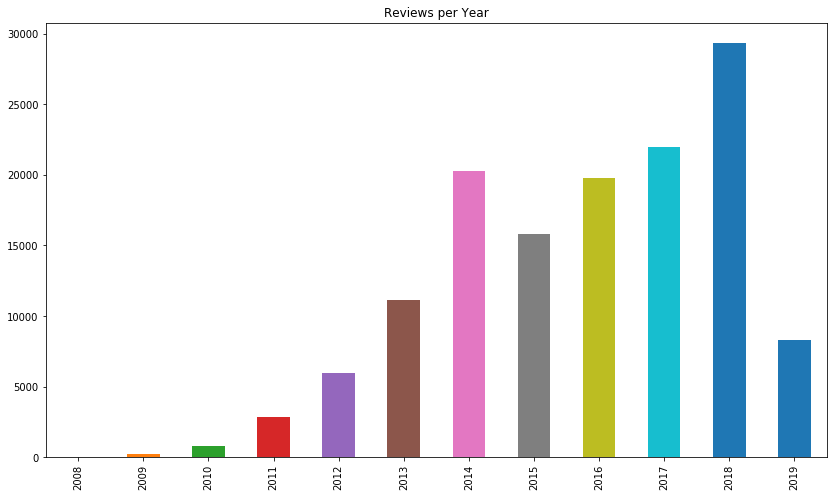

In [42]:
fig, axes = plt.subplots(ncols=1, figsize=(14, 8))
df_main.Year.value_counts().sort_index().plot.bar(title='Reviews per Year');